# Distancia até a praia

In [1]:
import geopandas as gpd

In [6]:
praias = gpd.read_file('../01.Dados/Transporte/Transporte-Vegetacao-UsoDoSolo/Vegetação e Uso do Solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')
rj = gpd.read_file('../01.Dados/Mapas/RJ-MINUC/RJ-MINUC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

In [7]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

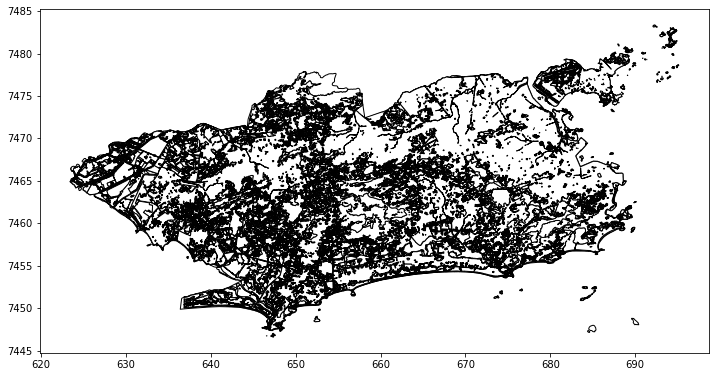

In [9]:
base = rj.plot(color='white',edgecolor='black',figsize=(12,8))
praias.plot(ax=base,color='white',edgecolor='black',figsize=(12,8))

In [11]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [15]:
praias = praias[praias['legenda']=='Praia']
praias.head()

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
21,P,2016-01-01T00:00:00,Praia,3042.035156,257.566546,19891,Outros,Praia,,,3042.036027,"POLYGON ((646.841 7448.837, 646.797 7448.877, ..."
22,P,2016-01-01T00:00:00,Praia,2155.254395,274.902433,19892,Outros,Praia,,,2155.254100,"POLYGON ((646.892 7449.217, 646.889 7449.211, ..."
23,P,2016-01-01T00:00:00,Praia,4818.130371,445.290523,19893,Outros,Praia,,,4818.129025,"POLYGON ((646.756 7449.295, 646.744 7449.264, ..."
24,P,2016-01-01T00:00:00,Praia,943641.800781,20812.992794,19894,Outros,Praia,,,943641.805845,"POLYGON ((640.986 7450.322, 641.073 7450.321, ..."
25,P,2016-01-01T00:00:00,Praia,194036.399902,8011.623950,19895,Outros,Praia,,,194036.398225,"MULTIPOLYGON (((640.042 7452.093, 640.075 7452..."


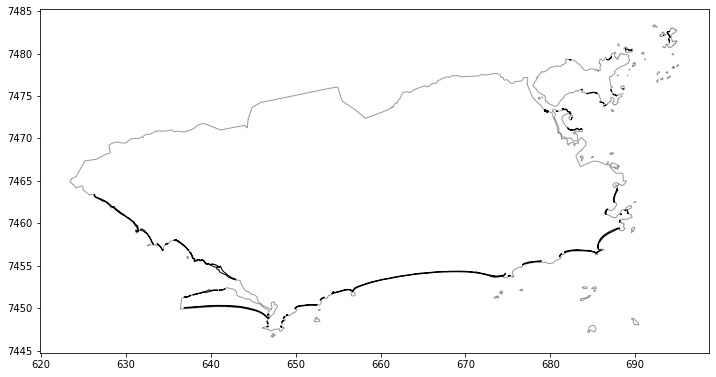

In [17]:
base = rj.plot(color='white',edgecolor='black',alpha=0.4,figsize=(12,8))
praias.plot(ax=base,color='white',edgecolor='black',figsize=(12,8))

In [18]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_metro,Dist_trans,geometry,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,0.443193,POINT (657.514 7453.832),1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,3.642787,POINT (670.524 7461.803),7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,0.641470,POINT (674.345 7469.440),6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,0.422370,POINT (662.701 7457.284),3.404589
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,0.214605,POINT (656.019 7453.574),1.369015


In [19]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_metro,Dist_trans,Dist_Praia
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735,0.560701
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628,-0.185829
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363,-0.196554
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240,-0.104570
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653,-0.361519
Dist_metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040,0.187805
Dist_trans,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000,0.230641
Dist_Praia,-0.290745,0.560701,-0.317743,-0.185829,-0.196554,-0.104570,-0.361519,0.187805,0.230641,1.000000


In [20]:
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')